In [67]:
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import PolynomialFeatures


In [2]:
# import importlib
# importlib.reload(plt); importlib.reload(plt); importlib.reload(sns)

In [3]:
import geopandas as gpd
from dbfread import DBF

## EDA and Visualizations

In [4]:
## Primary data set - NYC Street Tree Census from 2015
census = pd.read_csv('new_york_tree_census_2015.csv')
census.head()

,tree_id,block_id,created_at,tree_dbh,stump_diam,curb_loc,status,health,spc_latin,spc_common,...,st_assem,st_senate,nta,nta_name,boro_ct,state,latitude,longitude,x_sp,y_sp
0,606945,305778,2016-06-28,10,0,OnCurb,Alive,Good,Fraxinus pennsylvanica,green ash,...,25,14,QN37,Kew Gardens Hills,4125700,New York,40.724339,-73.805180,1.038250e+06,203232.9417
1,160321,341273,2015-08-19,9,0,OnCurb,Alive,Good,Gleditsia triacanthos var. inermis,honeylocust,...,34,13,QN28,Jackson Heights,4030902,New York,40.756626,-73.894167,1.013571e+06,214953.6472
2,541347,325281,2015-12-30,7,0,OnCurb,Alive,Good,Pyrus calleryana,Callery pear,...,32,10,QN76,Baisley Park,4028800,New York,40.679777,-73.788463,1.042923e+06,187008.2671
3,613930,203822,2016-07-05,10,0,OnCurb,Alive,Good,Pyrus calleryana,Callery pear,...,46,22,BK31,Bay Ridge,3005000,New York,40.622743,-74.037543,9.738279e+05,166160.5847
4,18353,338911,2015-06-13,4,0,OnCurb,Alive,Good,Prunus virginiana,'Schubert' chokecherry,...,31,10,QN12,Hammels-Arverne-Edgemere,4095400,New York,40.596514,-73.797622,1.040452e+06,156667.5017


<AxesSubplot:xlabel='guards', ylabel='count'>

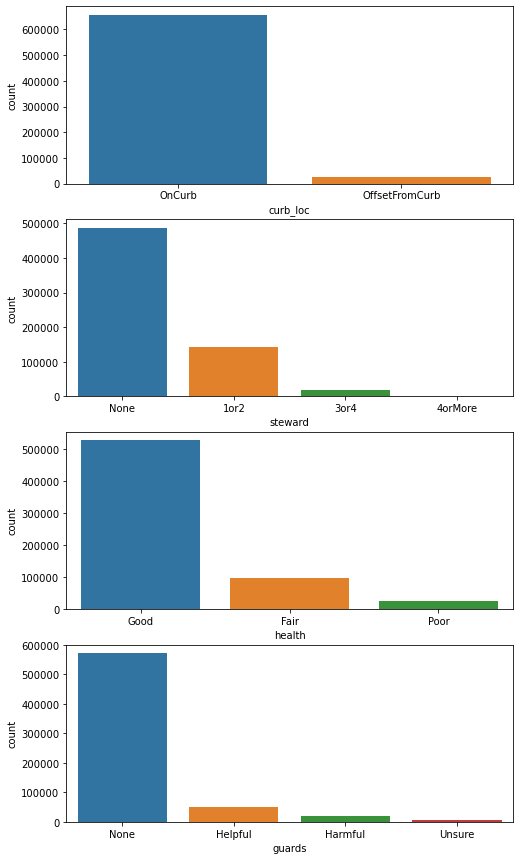

In [5]:
#categorical_features = ['spc_common', 'curb_loc', 'steward', 'health']
fig, axs = plt.subplots(nrows = 4,  figsize=(8,15))

sns.countplot(x=census['curb_loc'], ax=axs[0])
sns.countplot(x=census['steward'], ax=axs[1])
sns.countplot(x=census['health'], ax=axs[2])
sns.countplot(x=census['guards'], ax=axs[3])

In [6]:
## NYC NTA with corrosponding codes and neighborhood areas
nta = pd.read_csv('nynta.csv')
nta.head()

,the_geom,BoroCode,BoroName,CountyFIPS,NTACode,NTAName,Shape_Leng,Shape_Area
0,MULTIPOLYGON (((-73.94732672160586 40.62916656...,3,Brooklyn,47,BK43,Midwood,"27,996.5912736","35,799,637.8103"
1,MULTIPOLYGON (((-73.94193078816201 40.70072523...,3,Brooklyn,47,BK75,Bedford,"29,992.9191744","32,629,833.1149"
2,MULTIPOLYGON (((-73.89138023380268 40.86170058...,2,Bronx,5,BX40,Fordham South,"15,878.2729212","6,307,283.62202"
3,MULTIPOLYGON (((-73.9760493559142 40.631275905...,3,Brooklyn,47,BK88,Borough Park,"39,247.227722","54,005,019.2286"
4,MULTIPOLYGON (((-73.90855790522774 40.65209593...,3,Brooklyn,47,BK96,Rugby-Remsen Village,"30,957.8533949","32,706,946.4035"


In [7]:
nta = nta.rename(columns={'NTACode': "nta"})

In [8]:
#df = census merged on nta
df = pd.merge(census, nta, on='nta')
df.head()

,tree_id,block_id,created_at,tree_dbh,stump_diam,curb_loc,status,health,spc_latin,spc_common,...,longitude,x_sp,y_sp,the_geom,BoroCode,BoroName,CountyFIPS,NTAName,Shape_Leng,Shape_Area
0,606945,305778,2016-06-28,10,0,OnCurb,Alive,Good,Fraxinus pennsylvanica,green ash,...,-73.805180,1038250.055,203232.9417,MULTIPOLYGON (((-73.81497208257481 40.73856071...,4,Queens,81,Kew Gardens Hills,"33,109.3220103","37,891,124.4813"
1,679996,307398,2016-08-25,4,0,OnCurb,Alive,Good,Quercus palustris,pin oak,...,-73.823070,1033288.667,204501.9562,MULTIPOLYGON (((-73.81497208257481 40.73856071...,4,Queens,81,Kew Gardens Hills,"33,109.3220103","37,891,124.4813"
2,680506,307388,2016-08-25,4,0,OnCurb,Alive,Good,Carpinus betulus,European hornbeam,...,-73.819915,1034165.471,203462.1729,MULTIPOLYGON (((-73.81497208257481 40.73856071...,4,Queens,81,Kew Gardens Hills,"33,109.3220103","37,891,124.4813"
3,691878,305754,2016-09-01,17,0,OffsetFromCurb,Alive,Good,Quercus phellos,willow oak,...,-73.813822,1035854.144,203506.7804,MULTIPOLYGON (((-73.81497208257481 40.73856071...,4,Queens,81,Kew Gardens Hills,"33,109.3220103","37,891,124.4813"
4,692503,307786,2016-09-01,15,0,OnCurb,Alive,Good,Fraxinus pennsylvanica,green ash,...,-73.822124,1033558.531,200722.5845,MULTIPOLYGON (((-73.81497208257481 40.73856071...,4,Queens,81,Kew Gardens Hills,"33,109.3220103","37,891,124.4813"


/Users/christinegao/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='tree_dbh'>

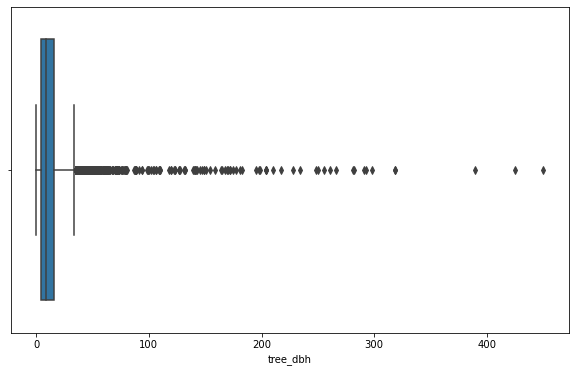

In [9]:
plt.figure(figsize=(10,6))
sns.boxplot(df['tree_dbh'])

##observe outliers in the tree diameter - we will normalize this

## Data Cleaning / Preprocessing

For our analysis, we will investigate only the live trees.

In [12]:
## Removal of dead trees and stumps 
df1 = df[df["status"].str.contains("Dead|Stump")==False]
df1.head()

,tree_id,block_id,created_at,tree_dbh,stump_diam,curb_loc,status,health,spc_latin,spc_common,...,longitude,x_sp,y_sp,the_geom,BoroCode,BoroName,CountyFIPS,NTAName,Shape_Leng,Shape_Area
0,606945,305778,2016-06-28,10,0,OnCurb,Alive,Good,Fraxinus pennsylvanica,green ash,...,-73.805180,1038250.055,203232.9417,MULTIPOLYGON (((-73.81497208257481 40.73856071...,4,Queens,81,Kew Gardens Hills,"33,109.3220103","37,891,124.4813"
1,679996,307398,2016-08-25,4,0,OnCurb,Alive,Good,Quercus palustris,pin oak,...,-73.823070,1033288.667,204501.9562,MULTIPOLYGON (((-73.81497208257481 40.73856071...,4,Queens,81,Kew Gardens Hills,"33,109.3220103","37,891,124.4813"
2,680506,307388,2016-08-25,4,0,OnCurb,Alive,Good,Carpinus betulus,European hornbeam,...,-73.819915,1034165.471,203462.1729,MULTIPOLYGON (((-73.81497208257481 40.73856071...,4,Queens,81,Kew Gardens Hills,"33,109.3220103","37,891,124.4813"
3,691878,305754,2016-09-01,17,0,OffsetFromCurb,Alive,Good,Quercus phellos,willow oak,...,-73.813822,1035854.144,203506.7804,MULTIPOLYGON (((-73.81497208257481 40.73856071...,4,Queens,81,Kew Gardens Hills,"33,109.3220103","37,891,124.4813"
4,692503,307786,2016-09-01,15,0,OnCurb,Alive,Good,Fraxinus pennsylvanica,green ash,...,-73.822124,1033558.531,200722.5845,MULTIPOLYGON (((-73.81497208257481 40.73856071...,4,Queens,81,Kew Gardens Hills,"33,109.3220103","37,891,124.4813"


(array([6.50597e+05, 1.49400e+03, 3.10000e+01, 2.10000e+01, 1.30000e+01,
        5.00000e+00, 7.00000e+00, 3.00000e+00, 0.00000e+00, 2.00000e+00]),
 array([  0. ,  42.5,  85. , 127.5, 170. , 212.5, 255. , 297.5, 340. ,
        382.5, 425. ]),
 <BarContainer object of 10 artists>)

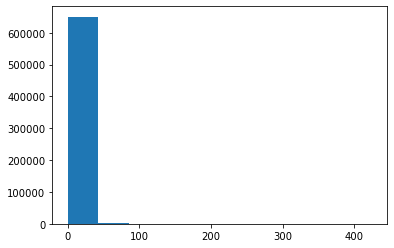

In [13]:
plt.figure(figsize=(6,4))
plt.hist(df1['tree_dbh'])

In [14]:
lower = df1['tree_dbh'].quantile(0.01)
upper = df1['tree_dbh'].quantile(0.99)

df2 = df1[(df1['tree_dbh'] < upper) & (df1['tree_dbh'] > lower)]

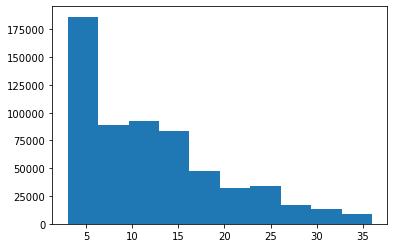

In [15]:
## New histogram omitting outliers within a 98% range
plt.figure(figsize=(6,4))

plt.hist(df2['tree_dbh'])
census_clean=df2

In [16]:
# calculating tree counts by nta 
tree_nta = pd.DataFrame(df.groupby('nta')['tree_id'].count())
tree_nta1 = tree_nta.reset_index()
tree_nta2 = tree_nta1.rename(columns={'tree_id':'tree counts'})
tree_nta_density = pd.merge(df, tree_nta2, on='nta')
tree_nta_density.head()

,tree_id,block_id,created_at,tree_dbh,stump_diam,curb_loc,status,health,spc_latin,spc_common,...,x_sp,y_sp,the_geom,BoroCode,BoroName,CountyFIPS,NTAName,Shape_Leng,Shape_Area,tree counts
0,606945,305778,2016-06-28,10,0,OnCurb,Alive,Good,Fraxinus pennsylvanica,green ash,...,1038250.055,203232.9417,MULTIPOLYGON (((-73.81497208257481 40.73856071...,4,Queens,81,Kew Gardens Hills,"33,109.3220103","37,891,124.4813",5088
1,679996,307398,2016-08-25,4,0,OnCurb,Alive,Good,Quercus palustris,pin oak,...,1033288.667,204501.9562,MULTIPOLYGON (((-73.81497208257481 40.73856071...,4,Queens,81,Kew Gardens Hills,"33,109.3220103","37,891,124.4813",5088
2,680506,307388,2016-08-25,4,0,OnCurb,Alive,Good,Carpinus betulus,European hornbeam,...,1034165.471,203462.1729,MULTIPOLYGON (((-73.81497208257481 40.73856071...,4,Queens,81,Kew Gardens Hills,"33,109.3220103","37,891,124.4813",5088
3,691878,305754,2016-09-01,17,0,OffsetFromCurb,Alive,Good,Quercus phellos,willow oak,...,1035854.144,203506.7804,MULTIPOLYGON (((-73.81497208257481 40.73856071...,4,Queens,81,Kew Gardens Hills,"33,109.3220103","37,891,124.4813",5088
4,692503,307786,2016-09-01,15,0,OnCurb,Alive,Good,Fraxinus pennsylvanica,green ash,...,1033558.531,200722.5845,MULTIPOLYGON (((-73.81497208257481 40.73856071...,4,Queens,81,Kew Gardens Hills,"33,109.3220103","37,891,124.4813",5088


In [82]:
tree_nta_density['Shape_Area'] = census_clean['Shape_Area'].apply(lambda x: float(x.split()[0].replace(',', '')))
tree_nta_density['tree density'] = tree_nta_density['tree counts']/tree_nta_density['Shape_Area']
##tree_nta_density_final - contains tree density (tree count per nta divided by area of each nta)

,tree_id,block_id,created_at,tree_dbh,stump_diam,curb_loc,status,health,spc_latin,spc_common,...,y_sp,the_geom,BoroCode,BoroName,CountyFIPS,NTAName,Shape_Leng,Shape_Area,tree counts,tree density
0,606945,305778,2016-06-28,10,0,OnCurb,Alive,Good,Fraxinus pennsylvanica,green ash,...,203232.9417,MULTIPOLYGON (((-73.81497208257481 40.73856071...,4,Queens,81,Kew Gardens Hills,"33,109.3220103",3.789112e+07,5088,0.000134
1,679996,307398,2016-08-25,4,0,OnCurb,Alive,Good,Quercus palustris,pin oak,...,204501.9562,MULTIPOLYGON (((-73.81497208257481 40.73856071...,4,Queens,81,Kew Gardens Hills,"33,109.3220103",3.789112e+07,5088,0.000134
2,680506,307388,2016-08-25,4,0,OnCurb,Alive,Good,Carpinus betulus,European hornbeam,...,203462.1729,MULTIPOLYGON (((-73.81497208257481 40.73856071...,4,Queens,81,Kew Gardens Hills,"33,109.3220103",3.789112e+07,5088,0.000134
3,691878,305754,2016-09-01,17,0,OffsetFromCurb,Alive,Good,Quercus phellos,willow oak,...,203506.7804,MULTIPOLYGON (((-73.81497208257481 40.73856071...,4,Queens,81,Kew Gardens Hills,"33,109.3220103",3.789112e+07,5088,0.000134
4,692503,307786,2016-09-01,15,0,OnCurb,Alive,Good,Fraxinus pennsylvanica,green ash,...,200722.5845,MULTIPOLYGON (((-73.81497208257481 40.73856071...,4,Queens,81,Kew Gardens Hills,"33,109.3220103",3.789112e+07,5088,0.000134
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
683783,72105,233703,2015-07-16,3,0,OnCurb,Alive,Good,Ulmus parvifolia,Chinese elm,...,149536.9379,MULTIPOLYGON (((-73.9688899587795 40.575261238...,3,Brooklyn,47,West Brighton,"14,114.5370571",8.745782e+06,481,0.000055
683784,374586,207854,2015-10-25,7,0,OnCurb,Alive,Good,Ginkgo biloba,ginkgo,...,149810.4245,MULTIPOLYGON (((-73.9688899587795 40.575261238...,3,Brooklyn,47,West Brighton,"14,114.5370571",8.745782e+06,481,0.000055
683785,70230,233694,2015-07-16,12,0,OnCurb,Alive,Good,Fraxinus pennsylvanica,green ash,...,150564.7042,MULTIPOLYGON (((-73.9688899587795 40.575261238...,3,Brooklyn,47,West Brighton,"14,114.5370571",8.745782e+06,481,0.000055
683786,442173,207376,2015-11-09,12,0,OnCurb,Alive,Good,Quercus rubra,northern red oak,...,151239.2005,MULTIPOLYGON (((-73.9688899587795 40.575261238...,3,Brooklyn,47,West Brighton,"14,114.5370571",8.745782e+06,481,0.000055


In [95]:
tree_nta_density_final = tree_nta_density[['tree_id', 'health', 'status', 'tree_dbh', 'nta', 'Shape_Area', 'tree counts', 'tree density']]
tree_nta_density_final

,tree_id,health,status,tree_dbh,nta,Shape_Area,tree counts,tree density
0,606945,Good,Alive,10,QN37,3.789112e+07,5088,0.000134
1,679996,Good,Alive,4,QN37,3.789112e+07,5088,0.000134
2,680506,Good,Alive,4,QN37,3.789112e+07,5088,0.000134
3,691878,Good,Alive,17,QN37,3.789112e+07,5088,0.000134
4,692503,Good,Alive,15,QN37,3.789112e+07,5088,0.000134
...,...,...,...,...,...,...,...,...
683783,72105,Good,Alive,3,BK23,8.745782e+06,481,0.000055
683784,374586,Good,Alive,7,BK23,8.745782e+06,481,0.000055
683785,70230,Good,Alive,12,BK23,8.745782e+06,481,0.000055
683786,442173,Good,Alive,12,BK23,8.745782e+06,481,0.000055


## NY NTA 2020 Census Data

In [99]:
xls = pd.ExcelFile('demo_2015acs5yr_nta.xlsx')
xls1 = pd.ExcelFile('econ_2015acs5yr_nta.xlsx')
xls2 = pd.ExcelFile('hous_2015acs5yr_nta.xlsx')
xls3 = pd.ExcelFile('soc_2015acs5yr_nta.xlsx')

In [100]:
demdata = pd.read_excel(xls, 'DemData')
econdata = pd.read_excel(xls1, 'EconData')
housdata = pd.read_excel(xls2, 'HousData')
socdata = pd.read_excel(xls3, 'SocData')

In [101]:
dem = demdata[['GeoID', 'Pop_1E', 'BlNHP']]
dem = dem.rename(columns={'GeoID':'nta', 'Pop_1E':'Total Population', 'BlNHP':'Percent Black/African American'})

In [102]:
soc = socdata[['GeoID', 'EA_LTHSGrE', 'EA_LTHSGrP', 'EA_BchDHE', 'EA_BchDHP']]
soc = soc.rename(columns={'GeoID':'nta', 'EA_LTHSGrE': "Less than HS Grad Estimate", "EA_LTHSGrP": "Less than HS Grad Percent", 
                   'EA_BchDHE': 'Bachelor or Higher Estimate', 'EA_BchDHP':'Bachelor or Higher Percent'})

In [103]:
econ = econdata[['GeoID', 'MdHHIncE']]
econ = econ.rename(columns={'GeoID':'nta', 'MdHHIncE':'Median HH Income Estimate'})

In [104]:
hous = housdata[['GeoID', 'Borough', 'MdVlE', 'OcHU1P']]
hous = hous.rename(columns={'GeoID':'nta', 'MdVlE':'Median House Value Estimate', 'OcHU1P':'Percent Occupied Units'})

In [105]:
nta_df0 = pd.merge(dem, econ, on='nta')
nta_df = pd.merge(nta_df0, soc, on='nta')
nta_df1 = pd.merge(nta_df, hous, on='nta')

In [106]:
nta_df1

,nta,Total Population,Percent Black/African American,Median HH Income Estimate,Less than HS Grad Estimate,Less than HS Grad Percent,Bachelor or Higher Estimate,Bachelor or Higher Percent,Borough,Median House Value Estimate,Percent Occupied Units
0,BK27,33072,2.0,55681.0,5461,23.3,7597,32.4,Brooklyn,647778.0,94.2
1,BK31,82560,1.8,61389.0,8157,13.6,27234,45.4,Brooklyn,644029.0,91.8
2,BK75,73125,43.5,36737.0,9494,22.2,12300,28.8,Brooklyn,654007.0,87.7
3,BK29,63882,0.7,48508.0,12368,26.8,13256,28.7,Brooklyn,630095.0,93.5
4,BK28,92433,0.9,48812.0,19049,29.0,16407,25.0,Brooklyn,676633.0,93.7
...,...,...,...,...,...,...,...,...,...,...,...
190,BX63,37510,24.0,25893.0,8129,36.0,3116,13.8,The Bronx,249073.0,94.7
191,BX08,36493,24.9,28884.0,8847,38.2,2489,10.7,The Bronx,426773.0,91.1
192,BX59,27830,16.2,42528.0,4482,25.5,3166,18.0,The Bronx,419169.0,92.7
193,BX44,63712,68.8,39808.0,8659,21.5,7206,17.9,The Bronx,377741.0,92.5


In [113]:
master = pd.merge(tree_nta_density_final[['nta', 'Shape_Area']], nta_df1, on='nta')

master['Population Density'] = master['Total Population']/master['Shape_Area']

In [114]:
master.head()

,nta,Shape_Area,Total Population,Percent Black/African American,Median HH Income Estimate,Less than HS Grad Estimate,Less than HS Grad Percent,Bachelor or Higher Estimate,Bachelor or Higher Percent,Borough,Median House Value Estimate,Percent Occupied Units,Population Density
0,QN37,3.789112e+07,39267,7.2,62840.0,2967,11.6,10750,42.1,Queens,309396.0,93.3,0.001036
1,QN37,3.789112e+07,39267,7.2,62840.0,2967,11.6,10750,42.1,Queens,309396.0,93.3,0.001036
2,QN37,3.789112e+07,39267,7.2,62840.0,2967,11.6,10750,42.1,Queens,309396.0,93.3,0.001036
3,QN37,3.789112e+07,39267,7.2,62840.0,2967,11.6,10750,42.1,Queens,309396.0,93.3,0.001036
4,QN37,3.789112e+07,39267,7.2,62840.0,2967,11.6,10750,42.1,Queens,309396.0,93.3,0.001036


In [117]:
master1 = master[['nta', 'Population Density', 'Percent Black/African American', 'Less than HS Grad Estimate',
                  'Less than HS Grad Percent', 'Bachelor or Higher Estimate', 'Bachelor or Higher Percent', 
                  'Median HH Income Estimate', 'Borough', 'Median House Value Estimate', 'Percent Occupied Units']]
master2 = master1.groupby('nta').mean()
master2 = master2.reset_index()

In [118]:
master2

,nta,Population Density,Percent Black/African American,Less than HS Grad Estimate,Less than HS Grad Percent,Bachelor or Higher Estimate,Bachelor or Higher Percent,Median HH Income Estimate,Median House Value Estimate,Percent Occupied Units
0,BK09,0.002388,5.4,468.0,2.5,14302.0,77.3,102850.0,732992.0,87.9
1,BK17,0.001014,6.9,6482.0,13.8,18509.0,39.3,51203.0,472474.0,91.5
2,BK19,0.001945,1.0,3131.0,12.5,10431.0,41.8,33934.0,542894.0,88.9
3,BK21,0.000758,30.5,5877.0,30.0,4324.0,22.0,23005.0,421143.0,89.4
4,BK23,0.001784,0.6,771.0,5.7,6386.0,47.6,38805.0,274360.0,92.5
...,...,...,...,...,...,...,...,...,...,...
183,SI36,0.000372,3.9,2147.0,12.2,5072.0,28.9,64592.0,435556.0,91.4
184,SI37,0.000564,19.6,3266.0,18.4,4454.0,25.1,55408.0,365025.0,89.7
185,SI45,0.000378,1.0,1392.0,9.5,4582.0,31.1,74432.0,429999.0,91.6
186,SI48,0.000522,1.9,1539.0,8.4,6094.0,33.4,83032.0,420163.0,97.4


In [150]:
demo_tree_nta = tree_nta_density_final.merge(master2, on='nta')
demo_tree_nta = demo_tree_nta.dropna()
tree_demo_avg = demo_tree_nta.groupby('nta').mean()

(array([91., 22., 19., 18.,  5.,  5.,  5.,  9.,  3., 10.]),
 array([ 0.1 ,  9.11, 18.12, 27.13, 36.14, 45.15, 54.16, 63.17, 72.18,
        81.19, 90.2 ]),
 <BarContainer object of 10 artists>)

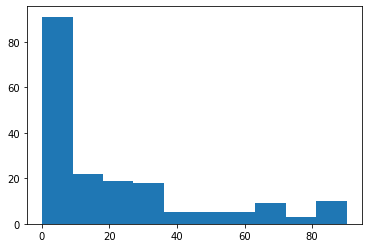

In [151]:
plt.hist(tree_demo_avg['Percent Black/African American'])

(array([91., 22., 19., 18.,  5.,  5.,  5.,  9.,  3., 10.]),
 array([ 0.1 ,  9.11, 18.12, 27.13, 36.14, 45.15, 54.16, 63.17, 72.18,
        81.19, 90.2 ]),
 <BarContainer object of 10 artists>)

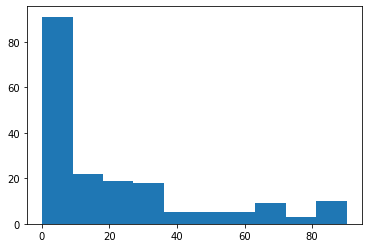

In [149]:
plt.hist(tree_demo_avg['Percent Black/African American'])

(array([25., 34., 46., 28., 18.,  9.,  6.,  5.,  6., 10.]),
 array([ 7.4 , 15.15, 22.9 , 30.65, 38.4 , 46.15, 53.9 , 61.65, 69.4 ,
        77.15, 84.9 ]),
 <BarContainer object of 10 artists>)

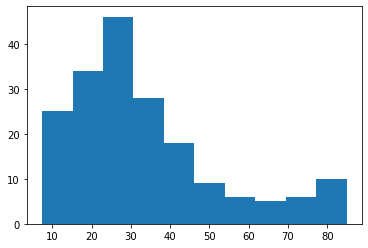

In [148]:
plt.hist(tree_demo_avg['Bachelor or Higher Percent'])

(array([31., 42., 45., 32., 22.,  5.,  5.,  4.,  0.,  1.]),
 array([ 20314. ,  34314.9,  48315.8,  62316.7,  76317.6,  90318.5,
        104319.4, 118320.3, 132321.2, 146322.1, 160323. ]),
 <BarContainer object of 10 artists>)

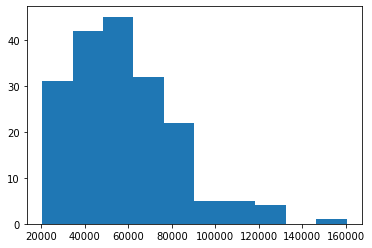

In [147]:
plt.hist(tree_demo_avg['Median HH Income Estimate'])

(array([ 6., 69., 63., 37.,  7.,  3.,  0.,  0.,  0.,  2.]),
 array([  37572. ,  233814.8,  430057.6,  626300.4,  822543.2, 1018786. ,
        1215028.8, 1411271.6, 1607514.4, 1803757.2, 2000000. ]),
 <BarContainer object of 10 artists>)

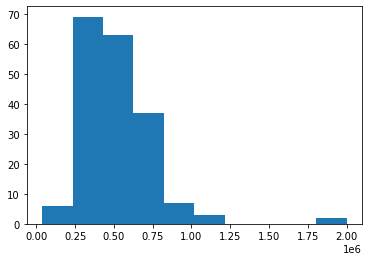

In [146]:
plt.hist(tree_demo_avg['Median House Value Estimate'])

(array([208496., 139043., 102134.,  79427.,  34386.,  21057.,  16248.,
           874.,      0.,   2096.]),
 array([0.00012156, 0.00071134, 0.00130111, 0.00189088, 0.00248066,
        0.00307043, 0.0036602 , 0.00424998, 0.00483975, 0.00542952,
        0.0060193 ]),
 <BarContainer object of 10 artists>)

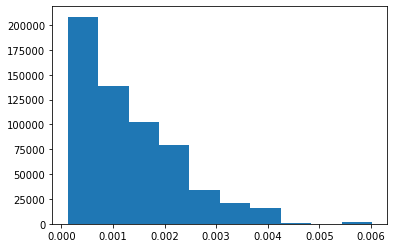

In [143]:
plt.hist(tree_demo_avg['Population Density'])

(array([ 1.,  0.,  3.,  2.,  4.,  8., 16., 62., 77., 14.]),
 array([71. , 73.7, 76.4, 79.1, 81.8, 84.5, 87.2, 89.9, 92.6, 95.3, 98. ]),
 <BarContainer object of 10 artists>)

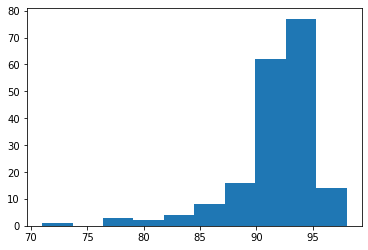

In [141]:
plt.hist(tree_demo_avg['Percent Occupied Units'])

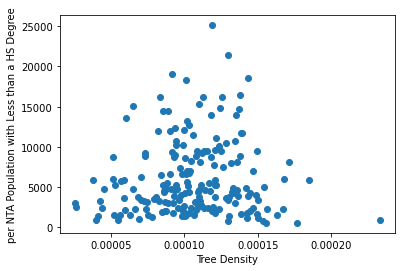

In [152]:
plt.scatter(tree_demo_avg['tree density'], tree_demo_avg['Less than HS Grad Estimate'])
plt.ylabel('per NTA Population with Less than a HS Degree')
plt.xlabel('Tree Density')
plt.show()

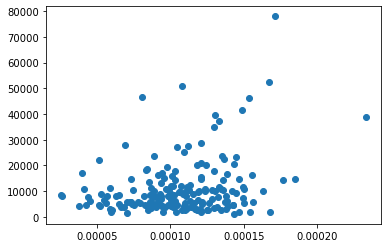

In [153]:
plt.scatter(tree_demo_avg['tree density'], tree_demo_avg['Bachelor or Higher Estimate'])

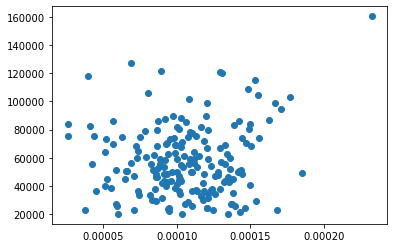

In [154]:
plt.scatter(tree_demo_avg['tree density'], tree_demo_avg['Median HH Income Estimate'])

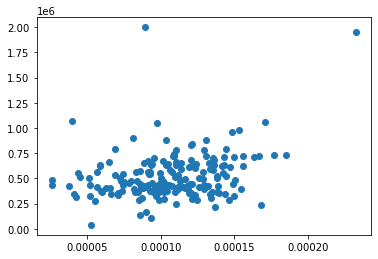

In [155]:
plt.scatter(tree_demo_avg['tree density'], tree_demo_avg['Median House Value Estimate'])

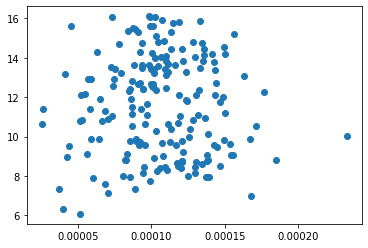

In [156]:
plt.scatter(tree_demo_avg['tree density'], tree_demo_avg['tree_dbh'])

In [157]:
tree_demo_avg[['tree_dbh', 'tree density', 'Population Density', 'Percent Black/African American', 
               'Less than HS Grad Percent', 'Bachelor or Higher Percent', 'Percent Occupied Units', 
               'Median HH Income Estimate', 'Median House Value Estimate']].corr()

,tree_dbh,tree density,Population Density,Percent Black/African American,Less than HS Grad Percent,Bachelor or Higher Percent,Percent Occupied Units,Median HH Income Estimate,Median House Value Estimate
tree_dbh,1.000000,-0.002292,-0.430791,0.005081,-0.290740,-0.049262,0.336521,0.115346,-0.109751
tree density,-0.002292,1.000000,0.533003,-0.057997,-0.022782,0.214987,-0.052943,0.125222,0.292122
Population Density,-0.430791,0.533003,1.000000,-0.019995,0.252083,0.187463,-0.194767,-0.140937,0.168228
Percent Black/African American,0.005081,-0.057997,-0.019995,1.000000,0.126127,-0.380058,0.059561,-0.290050,-0.291447
Less than HS Grad Percent,-0.290740,-0.022782,0.252083,0.126127,1.000000,-0.761540,0.281750,-0.812477,-0.380288
Bachelor or Higher Percent,-0.049262,0.214987,0.187463,-0.380058,-0.761540,1.000000,-0.484690,0.807972,0.654272
Percent Occupied Units,0.336521,-0.052943,-0.194767,0.059561,0.281750,-0.484690,1.000000,-0.403530,-0.483705
Median HH Income Estimate,0.115346,0.125222,-0.140937,-0.290050,-0.812477,0.807972,-0.403530,1.000000,0.601673
Median House Value Estimate,-0.109751,0.292122,0.168228,-0.291447,-0.380288,0.654272,-0.483705,0.601673,1.000000


In [175]:
tree_demo_avg

,tree_id,tree_dbh,Shape_Area,tree counts,tree density,Population Density,Percent Black/African American,Less than HS Grad Estimate,Less than HS Grad Percent,Bachelor or Higher Estimate,Bachelor or Higher Percent,Median HH Income Estimate,Median House Value Estimate,Percent Occupied Units
nta,,,,,,,,,,,,,,
BK09,116580.955287,12.254381,9.984670e+06,1767.0,0.000177,0.002388,5.4,468.0,2.5,14302.0,77.3,102850.0,732992.0,87.9
BK17,315062.745911,15.354918,6.334334e+07,5321.0,0.000084,0.001014,6.9,6482.0,13.8,18509.0,39.3,51203.0,472474.0,91.5
BK19,300835.815764,12.943970,1.718112e+07,1281.0,0.000075,0.001945,1.0,3131.0,12.5,10431.0,41.8,33934.0,542894.0,88.9
BK21,288878.472527,7.319597,3.872587e+07,1454.0,0.000038,0.000758,30.5,5877.0,30.0,4324.0,22.0,23005.0,421143.0,89.4
BK23,274649.688995,12.157895,8.745782e+06,481.0,0.000055,0.001784,0.6,771.0,5.7,6386.0,47.6,38805.0,274360.0,92.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SI36,355696.485821,12.559972,6.701074e+07,4952.0,0.000074,0.000372,3.9,2147.0,12.2,5072.0,28.9,64592.0,435556.0,91.4
SI37,327917.964645,8.826674,4.652383e+07,3840.0,0.000083,0.000564,19.6,3266.0,18.4,4454.0,25.1,55408.0,365025.0,89.7
SI45,368571.050729,16.106031,5.543487e+07,5452.0,0.000098,0.000378,1.0,1392.0,9.5,4582.0,31.1,74432.0,429999.0,91.6


In [176]:
features = tree_demo_avg[['tree_dbh', 'Population Density', 'Percent Black/African American', 'Bachelor or Higher Percent',
                         'Median HH Income Estimate', 'Median House Value Estimate', 'Percent Occupied Units']].to_numpy()

In [177]:
target = tree_demo_avg[['tree density']].to_numpy()

In [178]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=11)

## Regression Model

In [179]:
regr = linear_model.LinearRegression()

In [180]:
regr.fit(X_train, y_train)
y_pred = regr.predict(X_test)

In [181]:
print('MULTIPLE REGRESSION MODEL')
print()
print('Model Parameters or coefficient values for "a":')
print(regr.coef_)
print('Intercept or coefficient value for "b":')
print(regr.intercept_)
print()
print('MODEL ACCURACY:')
print(regr.score(X_train, y_train))
print()

MULTIPLE REGRESSION MODEL

Model Parameters or coefficient values for "a":
[[ 3.57449888e-06  2.25487268e-02  7.08022135e-08 -5.19659962e-07
   3.92608048e-10  3.65830873e-11  8.92963413e-07]]
Intercept or coefficient value for "b":
[-7.99373884e-05]

MODEL ACCURACY:
0.41349591450404044



In [182]:
mean_squared_error(y_test,y_pred)

5.608436131194892e-10

In [183]:
r2_score(y_test, y_pred)

0.4328402576311776

## Polyfit Model

In [199]:
poly = PolynomialFeatures(2, include_bias=False)
poly_features = poly.fit_transform(features)
X_train, X_test, y_train, y_test = train_test_split(poly_features, target, test_size=0.2, random_state=11)

In [200]:
poly_reg_model = linear_model.LinearRegression()
poly_reg_model.fit(X_train, y_train)

LinearRegression()

In [201]:
poly_reg_y_predicted = poly_reg_model.predict(X_test)
poly_reg_mse = mean_squared_error(y_test, poly_reg_y_predicted)
print(poly_reg_mse)

4.905249133198887e-10


In [202]:
print(poly_reg_model.score(X_train, y_train))

0.6014771936487493


In [203]:
print(r2_score(y_test, poly_reg_y_predicted))

0.5039508751529199
